Project 2: Diabetes Prediction

Data Preprocessing

In [20]:
# Importing the required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
# Reading the dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.shape

(100000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
print("Missing values:")
df.isnull().sum()

Missing values:


,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


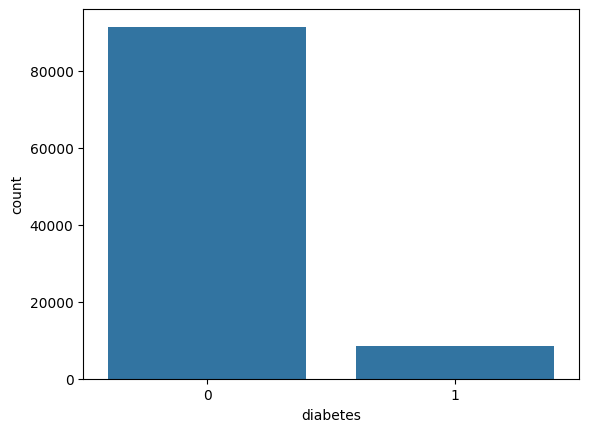

In [8]:
# Count plot
sns.countplot(x='diabetes', data=df)
plt.show()

In [9]:
# Encoding categorical variables
labelencoder = LabelEncoder()
df['gender'] = labelencoder.fit_transform(df['gender'])
df['smoking_history'] = labelencoder.fit_transform(df['smoking_history'])

In [10]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


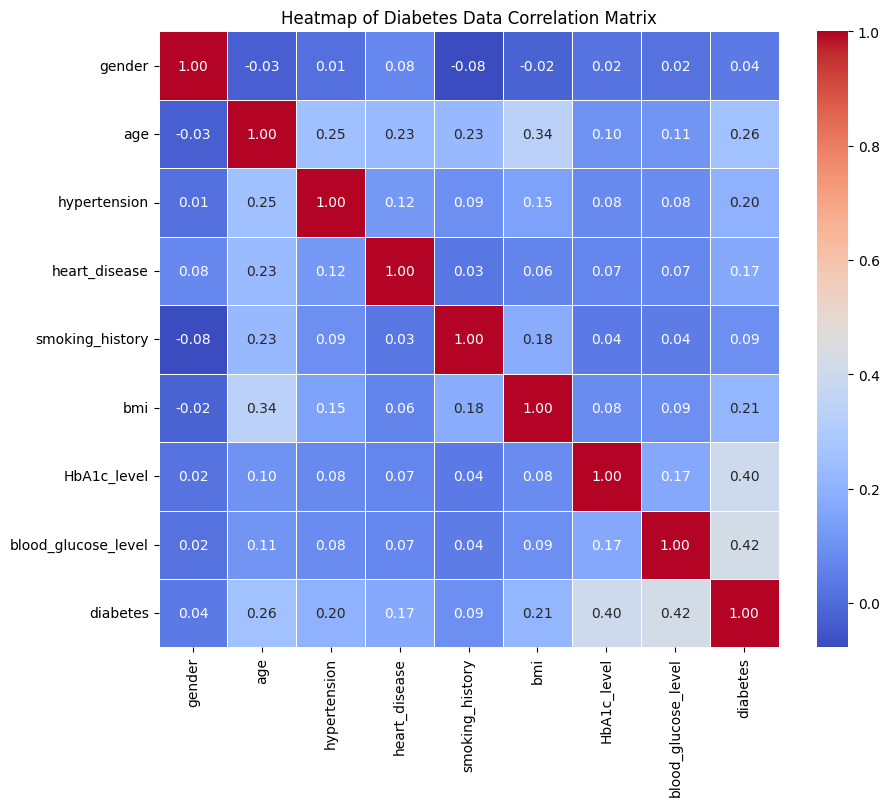

In [19]:
 # Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Diabetes Data Correlation Matrix')
plt.show()


In [11]:
# Separating the target and features
y = df['diabetes']
X = df.drop(columns='diabetes', axis=1)

In [12]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Splitting into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Making the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Saving the model
joblib.dump(model, "diabetes_model.sav")


Accuracy: 0.96
[[27208   214]
 [  944  1634]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27422
           1       0.88      0.63      0.74      2578

    accuracy                           0.96     30000
   macro avg       0.93      0.81      0.86     30000
weighted avg       0.96      0.96      0.96     30000



['diabetes_model.sav']

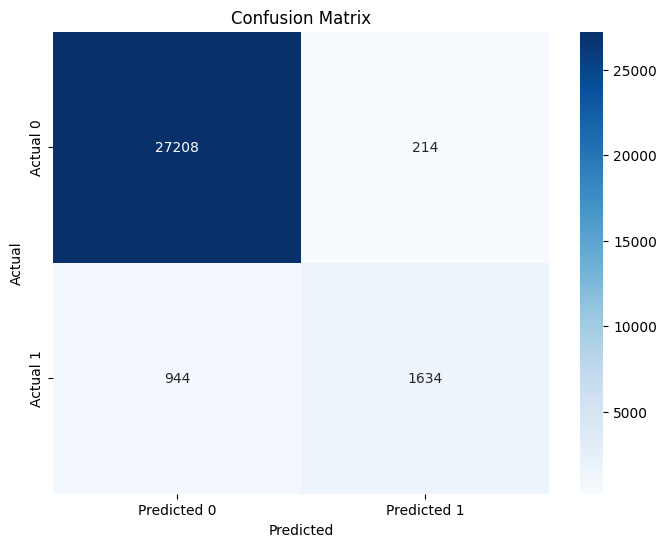

In [23]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Installing Streamlit

In [14]:
!pip install streamlit pyngrok scikit-learn joblib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [15]:
%%writefile app.py
import streamlit as st
import numpy as np
import joblib

def predict(data):
    model = joblib.load('diabetes_model.sav')
    return model.predict(data)

st.title('Diabetes Prediction')

st.write('---')

# Gender input (Male = 1, Female = 0)
gender = st.radio('Gender', ('Male', 'Female'))
gender = 1 if gender == 'Male' else 0

# Age input
age = st.number_input('Age', min_value=0, step=1)

# Hypertension input (0 = No, 1 = Yes)
hypertension = st.radio('Hypertension', (0, 1))

# Heart Disease input (0 = No, 1 = Yes)
heart_disease = st.radio('Heart Disease', (0, 1))

# Smoking History (0 = Never, 1 = Formerly, etc.)
smoking_history = st.radio('Smoking History', ('Never', 'Formerly', 'Current', 'Unknown'))
smoking_dict = {'Never': 0, 'Formerly': 1, 'Current': 2, 'Unknown': 3}
smoking_history = smoking_dict[smoking_history]

# BMI input
bmi = st.number_input('BMI', min_value=0.0)

# HbA1c Level input
hba1c_level = st.number_input('HbA1c Level', min_value=0.0)

# Blood Glucose Level input
blood_glucose_level = st.number_input('Blood Glucose Level', min_value=0)

if st.button('Predict Diabetes'):
    data = np.array([[gender, age, hypertension, heart_disease, smoking_history, bmi, hba1c_level, blood_glucose_level]])
    prediction = predict(data)
    if prediction[0] == 1:
        st.text('The patient is likely to have diabetes.')
    else:
        st.text('The patient is not likely to have diabetes.')


Writing app.py


In [16]:
!ngrok authtoken 2keKB9eNaiF7hUVHkRAkC0F1tba_6cLXdTcG8Z3uQvEDNjXfg

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [17]:
!pip install --upgrade pyngrok


In [18]:
from pyngrok import ngrok

# Start the Streamlit app
!streamlit run app.py &>/dev/null&

# Establish ngrok tunnel on the correct port (8501)
public_url = ngrok.connect(8501)
public_url


<NgrokTunnel: "https://018b-34-73-125-63.ngrok-free.app" -> "http://localhost:8501">